

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> 
IMDB dataset having 50K movie reviews for natural language processing or Text analytics. This is a dataset for binary sentiment classification containing substantially more data than previous benchmark datasets. We provide a set of 25,000 highly polar movie reviews for training and 25,000 for testing
which contains those columns:
 
 imdb_id 
 popularity 
 budget                  
 revenue                 
 original_title          
 cast                    
 homepage                
 director                
 tagline                 
 keywords                
 overview                
 runtime                 
 genres
 production_companies
 release_date            
 vote_count              
 vote_average            
 release_year            
 budget_adj              
 revenue_adj          

> Question that we could ask to analyse this data set

<li><a href="#Q1">Question 1 (what is the most genre that achieve highest revenue?)</a>
<li><a href="#Q2">Question 2  (What is the most rated movie?)</a>
<li><a href="#Q3">Question 3 (What is the film with highest revenue?)</a>
<li><a href="#Q4">Question 4 : What is the film with longest period?)</a>
<li><a href="#Q5">Question 5 (What is the film with longest period?)</a>

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import pdb
import pprint
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [2]:
df = pd.read_csv('tmdb-movies.csv') 
original_data = df.copy()
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [4]:
df.describe()


,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [5]:
df.shape

(10866, 21)

In [6]:
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [31]:
df.nunique().to_frame().rename(columns={0:'Count'})

,Count
id,10731
popularity,10684
budget,553
revenue,4698
original_title,10439
cast,10665
director,5018
runtime,243
genres,2022
release_date,5872


<Figure size 432x288 with 0 Axes>

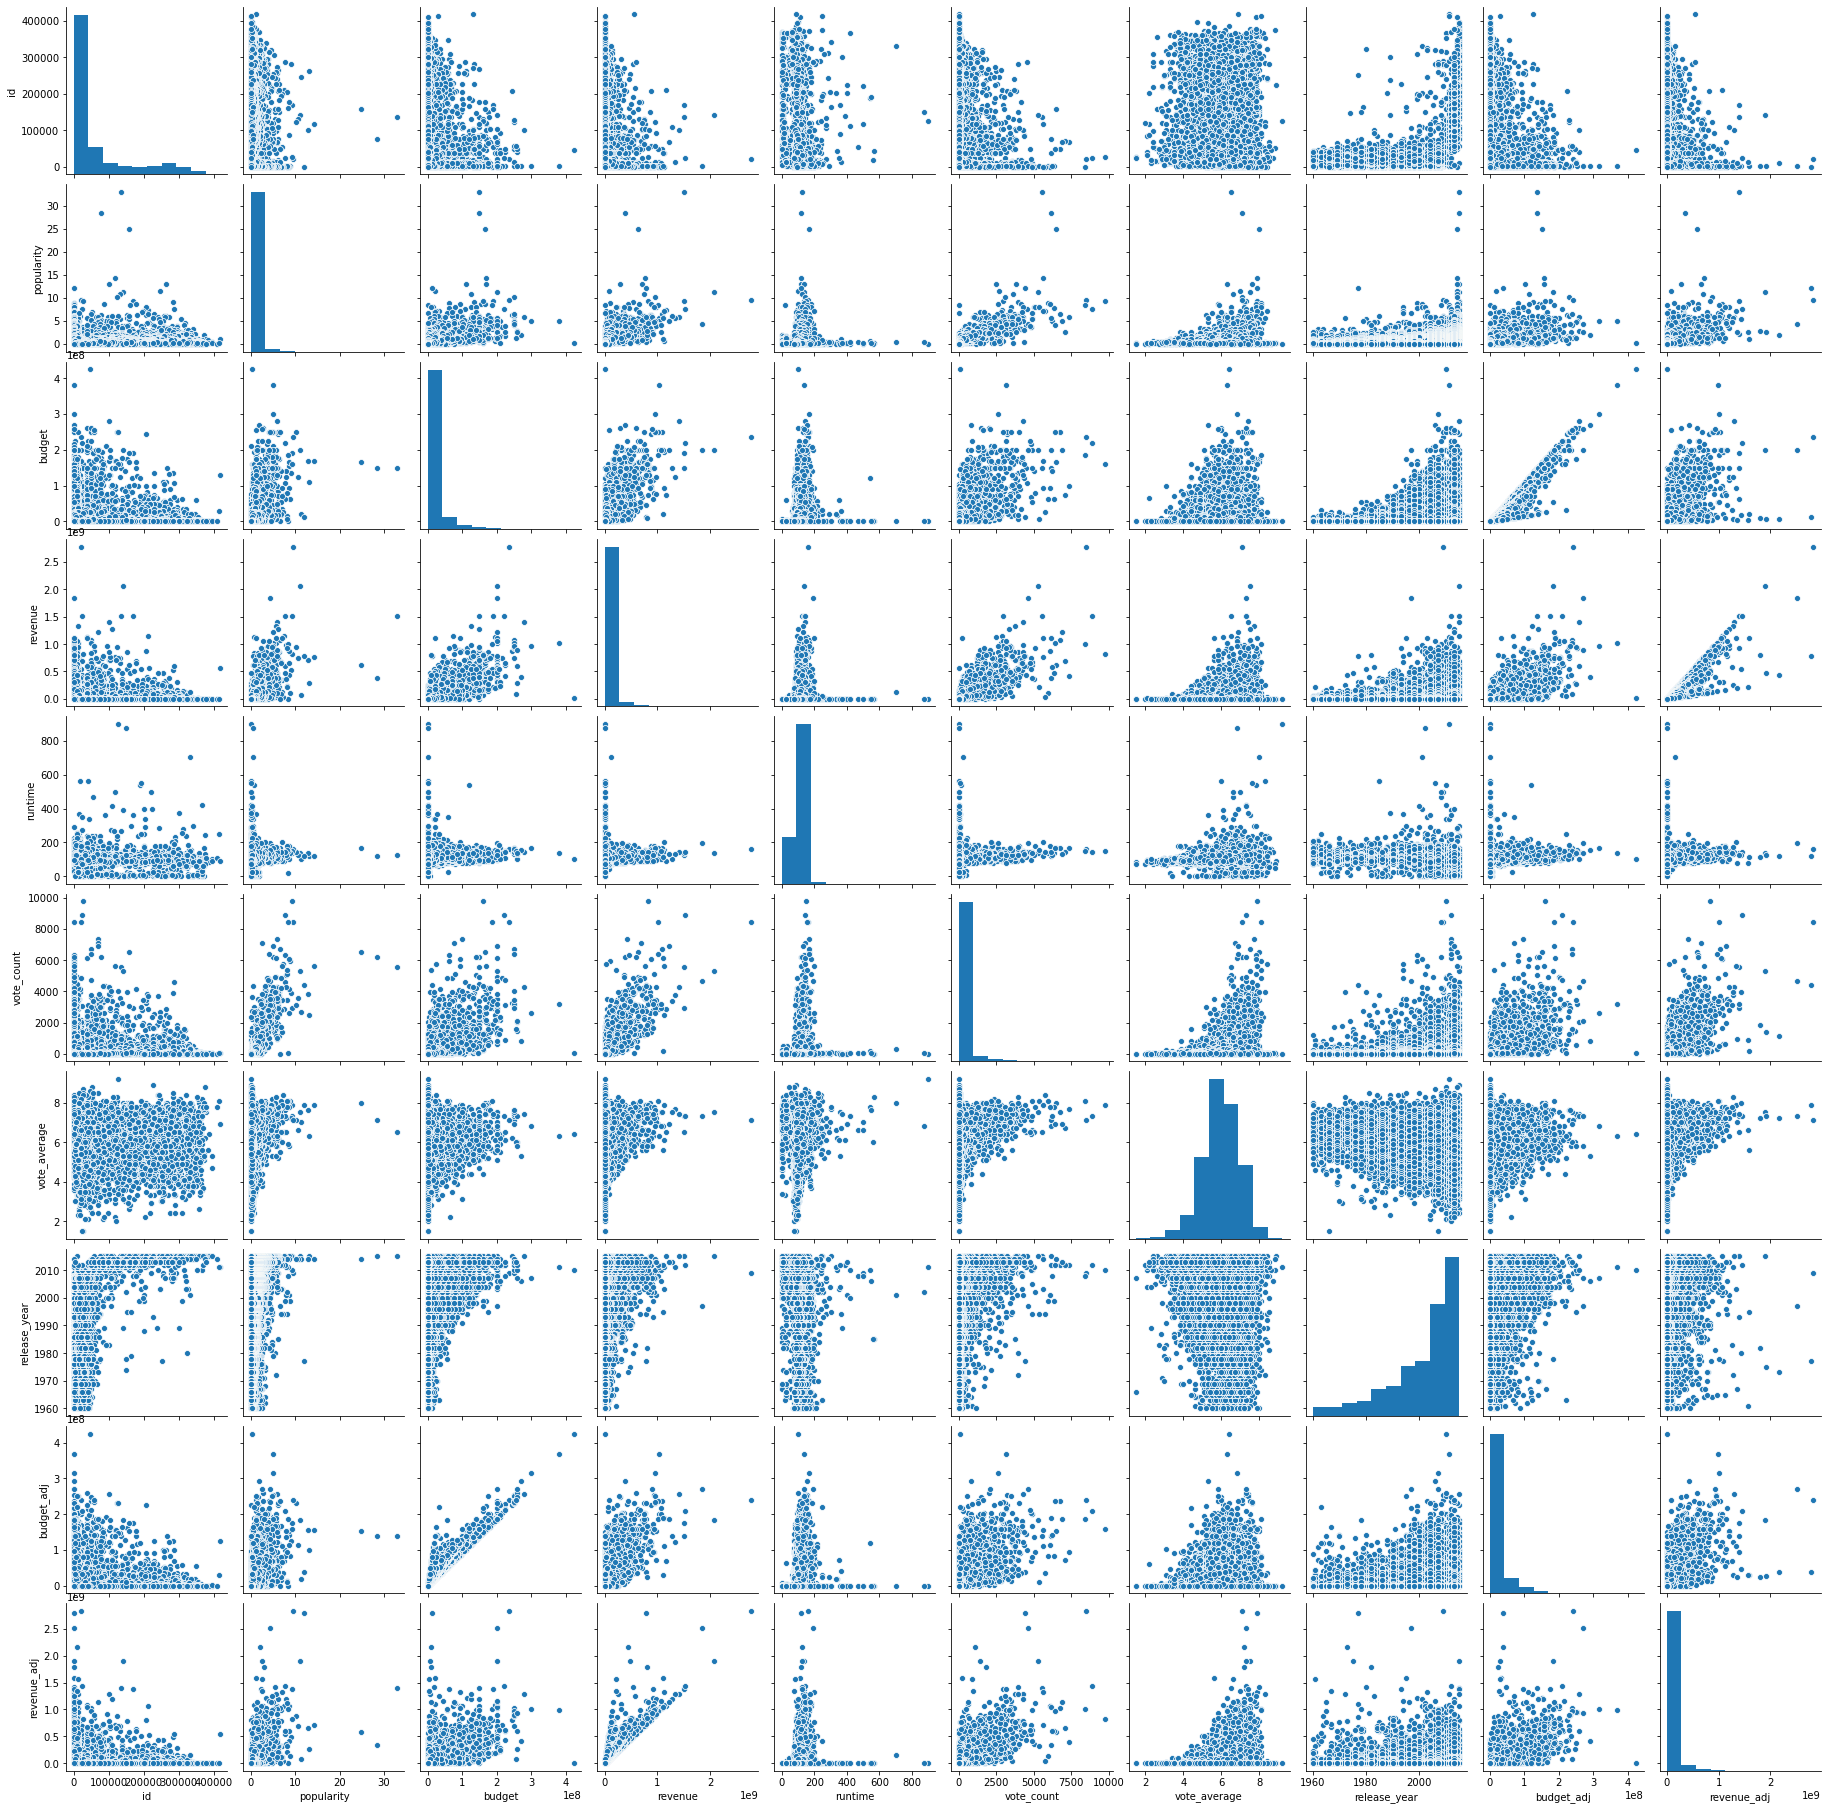

In [8]:
num_cols = ['popularity','budget','revenue','runtime','vote_count','vote_average','release_year','budget_adj','revenue_adj']
temp = df[num_cols]
plt.figure();
sns.pairplot(df);

<b><li> Obsevations from the data set:</b>
    <ul>
<li> films geners have more than one for every film so should first Seperating them.
<li> so many films not have home page link so we can drop this column

<h3> Data Cleaning ( a process in which we go through all of the data within a data and either remove or update information that is incomplete, incorrect, improperly formatted, duplicated, or irrelevants!)</h3><br>

<li> we need to do the follwoing 
<ul>
<li> drop unneeded columns.
<li> Seperating columns with several values.
<li>Changing release date column into date format.
<li>Removing the duplicacy in the rows.

## 1-Drop unneeded columns.

In [9]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [10]:
#deleting the unneeded columns

df.drop(['imdb_id','homepage','production_companies','overview','keywords','tagline','budget_adj'],axis =1,inplace =True)

In [11]:
df.head()

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,3.481613e+08
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,2.716190e+08
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.902723e+09
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1.385749e+09


### 2- Seperating columns with several values.

In [12]:
df.dropna(inplace=True)
genre_labels = set()
for s in df['genres'].str.split('|').values:genre_labels=genre_labels.union(set(s))
genre_labels

{'Action',
 'Adventure',
 'Animation',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Foreign',
 'History',
 'Horror',
 'Music',
 'Mystery',
 'Romance',
 'Science Fiction',
 'TV Movie',
 'Thriller',
 'War',
 'Western'}

In [13]:
"""Seperating columns with several values, split by an '|', into as many columns as needed"""
#the genre column has its data seperated by '|' character
#lets create a new columns for visualization
#first we need to know all type of genre, then count the number of each genre in our rows

init = {}
for i in range(len(df)):
    row_genres = df['genres'].iloc[i].split('|')
    for g in row_genres:
        if g in init:
            init[g]+=1
        if g not in init:
            init[g]=1
            
# #Create a new data frame

genre_df = pd.DataFrame(init.values()).T
genre_df.columns = init.keys()
genre_df = genre_df.T.rename(columns={0:'Genre Count'}).sort_values(by='Genre Count',ascending=False)
genre_df

#Checking df_c if split was conducted as intended
genre_df

,Genre Count
Drama,4747
Comedy,3775
Thriller,2903
Action,2377
Romance,1708
Horror,1636
Adventure,1465
Crime,1354
Science Fiction,1222
Family,1214


### 3-Changing release date column into date format

In [14]:
df.release_date = pd.to_datetime(df['release_date'])

In [15]:
df.dtypes

id                         int64
popularity               float64
budget                     int64
revenue                    int64
original_title            object
cast                      object
director                  object
runtime                    int64
genres                    object
release_date      datetime64[ns]
vote_count                 int64
vote_average             float64
release_year               int64
revenue_adj              float64
dtype: object

### 4-Removing the duplicacy in the rows

In [16]:
df.duplicated().sum()

1

In [17]:
df.drop_duplicates(keep ='first', inplace=True)
rows, col = df.shape

In [18]:
df.duplicated().sum()

0

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

In [19]:
def pie_plot(x, labels, title='',explode=None):
    fig, ax = plt.subplots(figsize=(20,10))
    ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    ax.set_title(title,fontsize=25)
    ax.pie(labels=labels,
            x=x,
            shadow=True, startangle=18,
            autopct='%1.1f%%',
            explode=explode);

In [20]:
def bar_plot(x, y, x_label='', y_label='', title=''):
    #visualizing the results
    plt.figure(figsize = (20,10)) #set a figure size
    ax=sns.barplot(x =x , y = y)
    # rotate xtick labels by 40 degrees
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right",fontsize = 12)
    plt.tight_layout()
    #gives names to x-axis , y-axis & the title
    plt.xlabel(x_label , fontsize = 20)
    plt.ylabel(y_label , fontsize = 20)
    plt.title(title,fontsize = 30)
    plt.show()

In [21]:
#defining the function
def calculate(column):
    #for highest earned profit
    high= df[column].idxmax()
    high_details=pd.DataFrame(df.loc[high])
    
    #for lowest earned profit
    low= df[column].idxmin()
    low_details=pd.DataFrame(df.loc[low])
    
    #collectin data in one place
    info=pd.concat([high_details, low_details], axis=1)
    
    return info

 <li> some functions to use it for the visualization.


<h3> Research Question 1 (what is the most genre that achieve highest revenue?)</h3>
<a id="Q1"></a>

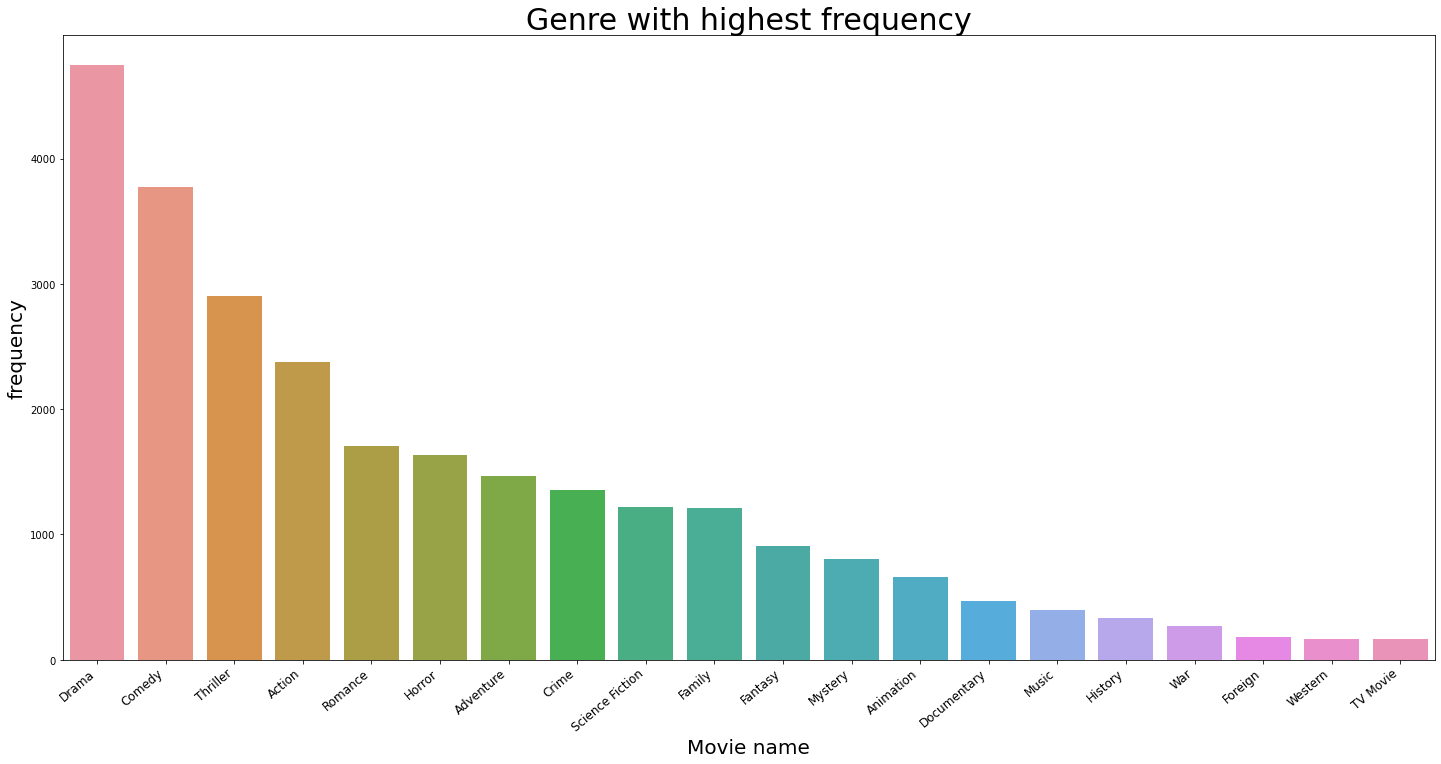

In [22]:
bar_plot(y=genre_df['Genre Count'],x=genre_df.index, 
         x_label='Movie name', y_label='frequency', 
         title='Genre with highest frequency')

<li> to now that what filmmakers prefer to make films : we find Drama is the first one.


<h3> Research Question 2  (What is the most rated movie?)</h3>
<a id="Q2"></a>

In [23]:
film_rate = df.sort_values(by='vote_average',ascending=False)[['original_title','vote_average']][:10]

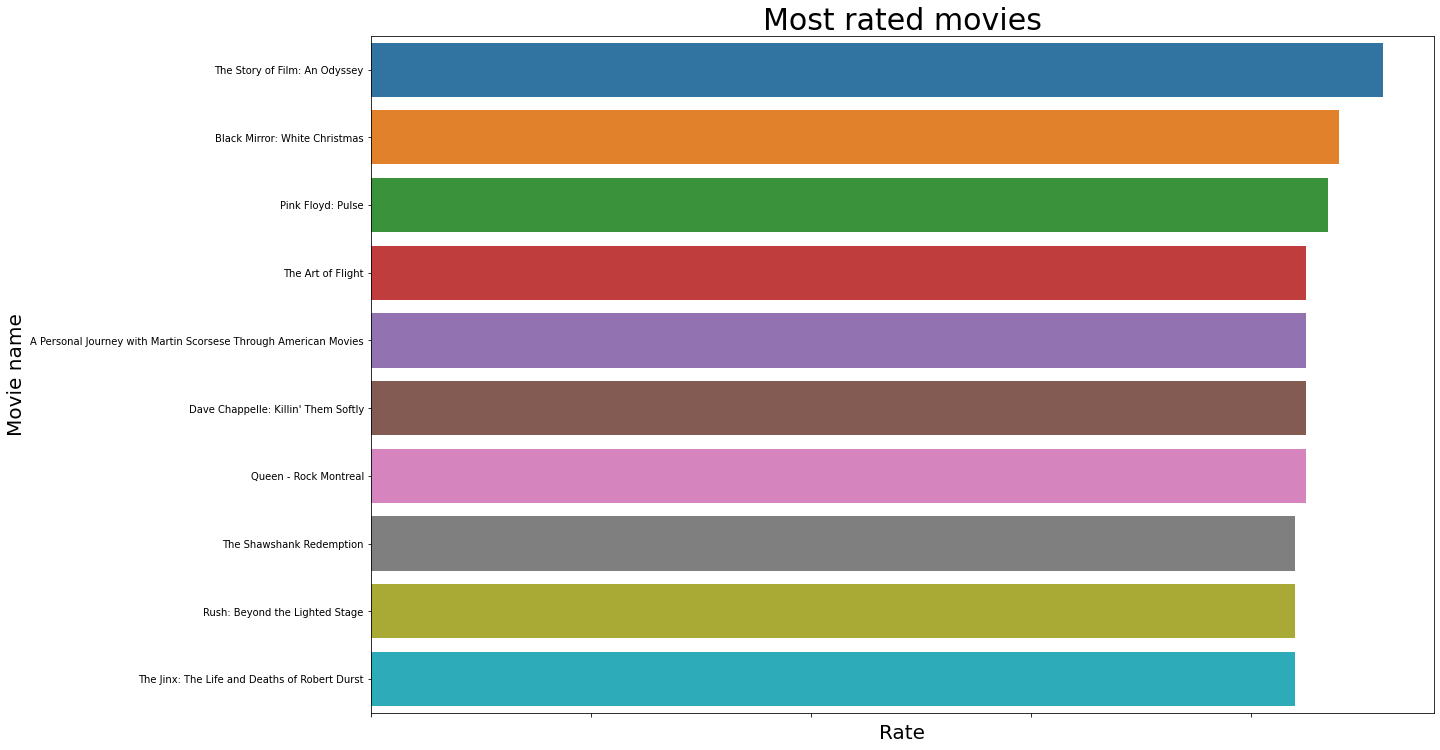

In [24]:
bar_plot(y=film_rate['original_title'],x=film_rate['vote_average'], 
         x_label='Rate', y_label='Movie name', title='Most rated movies')

<li> to now that which movies people prefer most

<h3>Research Question 3  (What is the film with highest revenue?)</h3>
<a id="Q3"></a>

In [25]:
film_revenue = df.sort_values(by='revenue',ascending=False)[['original_title','revenue']][:10]

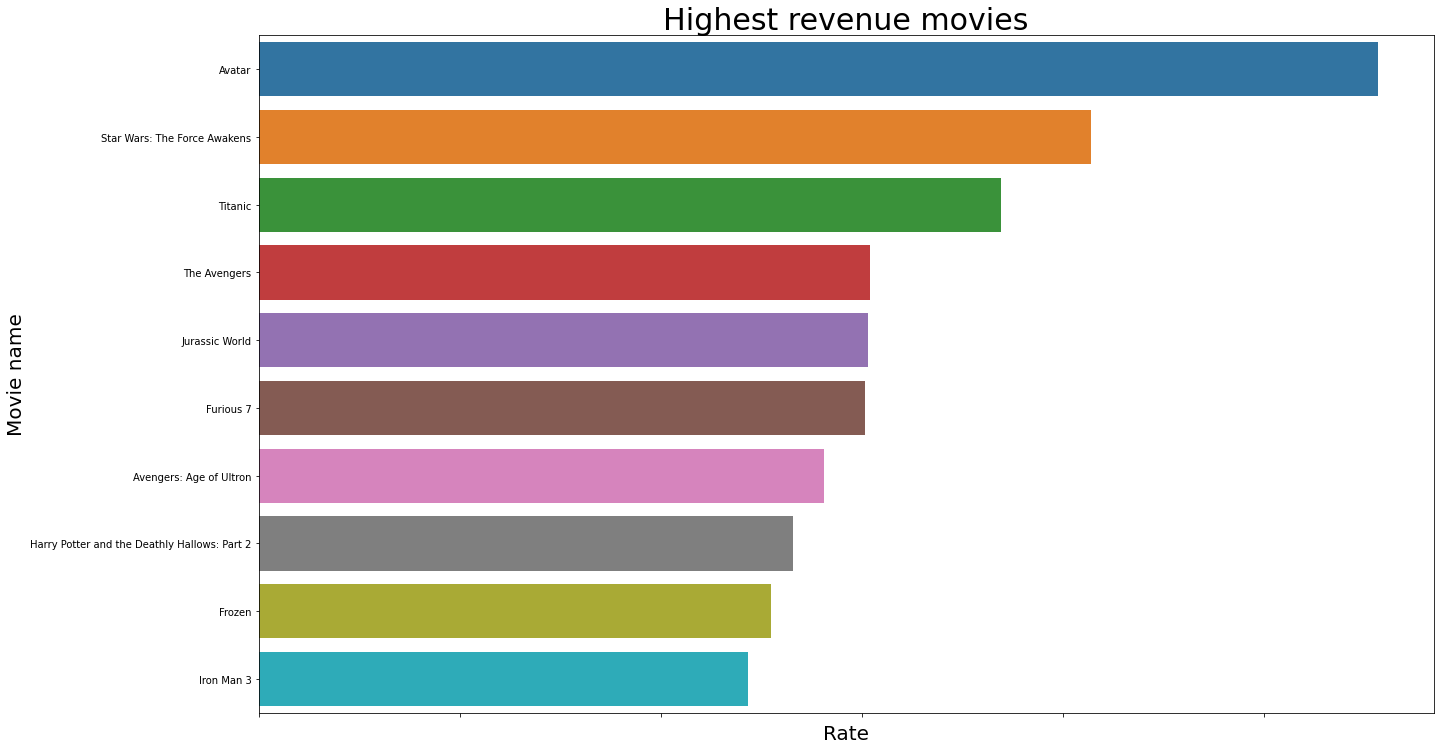

In [26]:
bar_plot(y=film_revenue['original_title'],x=film_revenue['revenue'], 
         x_label='Rate', y_label='Movie name', title='Highest revenue movies')

<li> to know most movies achieved highest revenue

<h3> Research Question 4 (What is the film with longest period?)</h3>
<a id="Q4"></a>

In [27]:
film_time = df.sort_values(by='runtime',ascending=False)[['original_title','runtime']][:10]

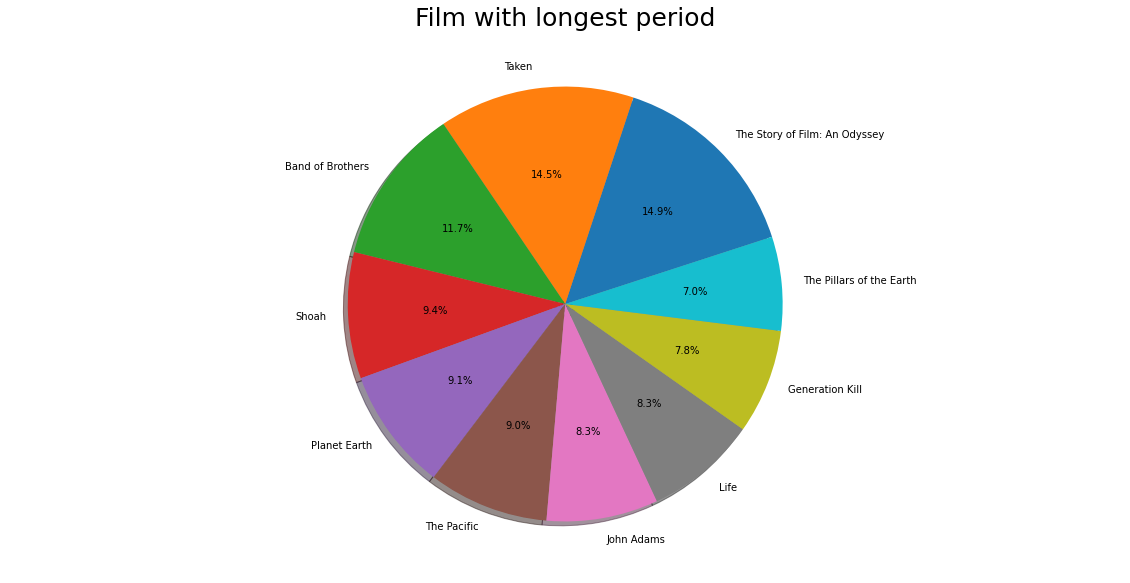

In [28]:
pie_plot(x=film_time['runtime'], labels=film_time['original_title'], 
         title='Film with longest period', explode=None)

 <li> we find that "the story film" have most runtime

### <h3> Research Question 5 (movies count over years)</h3>
<a id="Q5"></a>

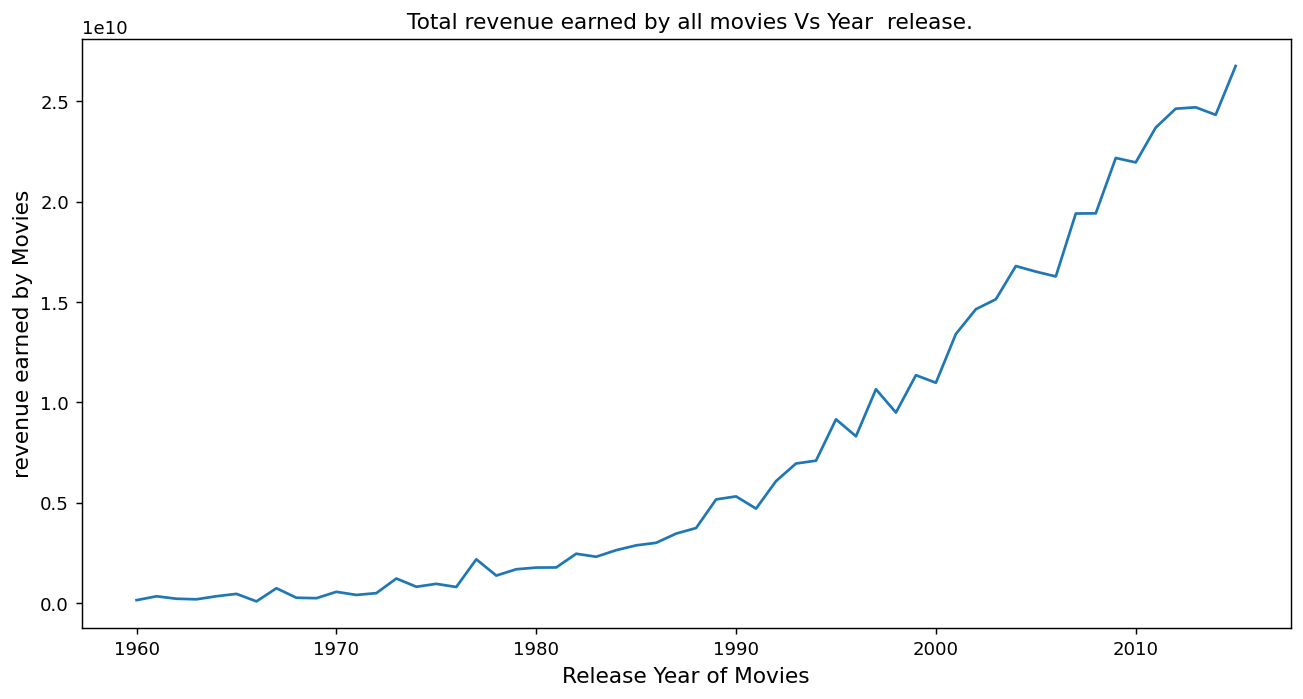

In [29]:
# we want to know the profits of movies for every year

profits_year = df.groupby('release_year')['revenue'].sum()

#figure size(width, height)
plt.figure(figsize=(12,6), dpi = 130)

#on x-axis
plt.xlabel('Release Year of Movies', fontsize = 12)
#on y-axis
plt.ylabel('revenue earned by Movies', fontsize = 12)
#title of the line plot
plt.title(' Total revenue earned by all movies Vs Year  release.')

#plotting the graph
plt.plot(profits_year)

#displaying the line plot
plt.show()

<a id='conclusions'></a>
## Conclusions

> After trimmed, cleaned explore the dataset we find the following notes: 

>•	Most movies genre with highest revenue are at first " Drama films " then in the second place are " comedian films' and least ones are War and historical films.

>•	we see that the most rated film is "the story of film an odyssey" and at the second place is " black mirror white Christmas".

>•	we should don’t forget most important factor of the measure of the success of films is revenue. so after visualizing that we find the most film in history achieved revenue is " Avatar " and after it is "star wars the force awakens".

>•	the last point that we explored is the runtime of the films and we find that film like "the story of film an odyssey" and "taken" have most runtime ever.

## Limitations
>•	data having so many missing values and tagline columns
>•  the data did not have normal distribution
>•  we not sure if the data provided to us is completel corect and up-to-date


## Submitting your Project 


In [30]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

4294967295